In [1]:
import torch
from PIL import Image
import cv2
import numpy as np

import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
from matplotlib import pyplot as plt

In [2]:
class AugDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        # Read an image with PIL
        image = Image.open(file_path)
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [37]:
from torch import nn

class UnetGenerator(nn.Module):
    """Create a Unet-based generator"""

    def __init__(self, input_nc, output_nc, num_downs, ngf=64, norm_layer=nn.BatchNorm2d, use_dropout=False):
        """Construct a Unet generator
        Parameters:
            input_nc (int)  -- the number of channels in input images
            output_nc (int) -- the number of channels in output images
            num_downs (int) -- the number of downsamplings in UNet. For example, # if |num_downs| == 7,
                                image of size 128x128 will become of size 1x1 # at the bottleneck
            ngf (int)       -- the number of filters in the last conv layer
            norm_layer      -- normalization layer

        We construct the U-Net from the innermost layer to the outermost layer.
        It is a recursive process.
        """
        super(UnetGenerator, self).__init__()
        # construct unet structure
        unet_block = UnetSkipConnectionBlock(ngf * 8, ngf * 8, input_nc=None, submodule=None, norm_layer=norm_layer, innermost=True)  # add the innermost layer
        for i in range(num_downs - 5):          # add intermediate layers with ngf * 8 filters
            unet_block = UnetSkipConnectionBlock(ngf * 8, ngf * 8, input_nc=None, submodule=unet_block, norm_layer=norm_layer, use_dropout=use_dropout)
        # gradually reduce the number of filters from ngf * 8 to ngf
        unet_block = UnetSkipConnectionBlock(ngf * 4, ngf * 8, input_nc=None, submodule=unet_block, norm_layer=norm_layer)
        unet_block = UnetSkipConnectionBlock(ngf * 2, ngf * 4, input_nc=None, submodule=unet_block, norm_layer=norm_layer)
        unet_block = UnetSkipConnectionBlock(ngf, ngf * 2, input_nc=None, submodule=unet_block, norm_layer=norm_layer)
        self.model = UnetSkipConnectionBlock(output_nc, ngf, input_nc=input_nc, submodule=unet_block, outermost=True, norm_layer=norm_layer)  # add the outermost layer

    def forward(self, input):
        """Standard forward"""
        return self.model(input)
    
input_nc= 3
output_nc = 3
num_downs = 7

UnetGenerator(input_nc, output_nc, num_downs, ngf=64, norm_layer=nn.BatchNorm2d, use_dropout=False)

NameError: name 'UnetSkipConnectionBlock' is not defined

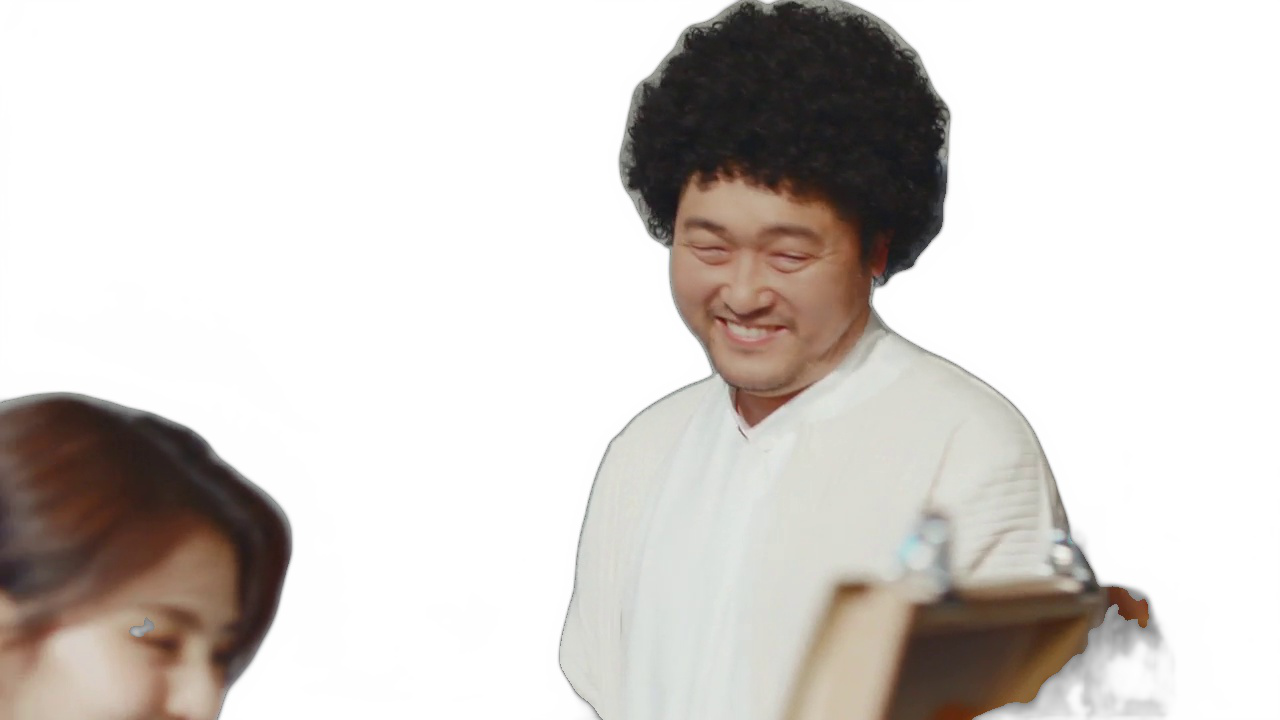

In [4]:
aug_dataset = AugDataset(
    file_paths=glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/train_data/im2_nobg/*.jpg"),
    labels=[1],
    transform=transform,
)
sample, _ = aug_dataset[0]
sample
sample.show()

In [2]:
import glob
import cv2
file_paths=glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data/im_refined2/*")
file_paths2=glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data/gt_refined2/*")


In [3]:
import torchvision.transforms as T
affine = T.RandomAffine(degrees=30, scale=(0.25, 2), fillcolor=0)
jitter = T.ColorJitter(brightness = 0.5, contrast = 0.5, saturation = 0.5)

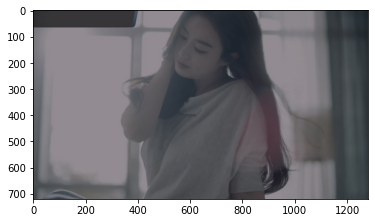

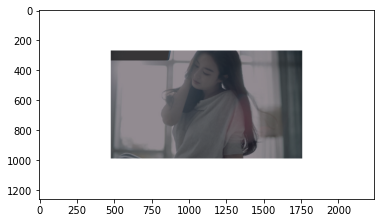

In [4]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import random

import torch
import torchvision.transforms as T

# for a in range(4):
#     for idx in range(len(file_paths)):
file_paths=glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data/im/*")
# print(file_paths)
idx=0

dst = file_paths[idx].split("/")[-1]

img = cv2.imread(file_paths[idx])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img_gray, 250, 255, cv2.THRESH_BINARY)


img = Image.open(file_paths[idx])
gt = Image.open(file_paths2[idx])

import random
scl = random.random()*1.25 + 0.25
deg = random.randint(-30, 30)
affine.fillcolor=255
affine.scale =(scl, scl)
affine.degrees =(deg, deg)

a = jitter(img)
affine.fillcolor=0

# white = np.zeros((720,1280,3))
# white = 255 - white

mask_inv = 255-mask
img = np.array(a)
img_fg = cv2.bitwise_and(img, img, mask=mask_inv)
# img_bg = cv2.bitwise_and(white, white, mask=mask)
img_bg = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
# plt.imshow(img_fg)
# plt.show()
# plt.imshow(img_bg)
# plt.show()
img = img_fg + img_bg
plt.imshow(img)
plt.show()

factor = 0.25
w = 1280
h = 720
new_w = int(factor*w)
new_h = int(factor*h)
top = int((h-new_h)/2)
bottom = int((h-new_h)/2)
left = int((w-new_w)/2)
right = int((w-new_w)/2)
borderType = cv2.BORDER_CONSTANT
image = cv2.copyMakeBorder(img, top, bottom, left, right, borderType, value=(255, 255, 255))

plt.imshow(image)
plt.show()
# b = jitter(gt)

#         dst_dir = "/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data/"
#         a.save(dst_dir + 'im_affined/' + dst[:-4] + '_' + str(scl) + '_' + str(deg)[2:5] + '.jpg')
#         b.save(dst_dir + 'gt_affined/' + dst[:-4] + '_' + str(scl) + '_' + str(deg)[2:5] + '.png')
# a.show()
# b.show()
            

In [10]:
ba_array = np.array(a)
a_array[a_array ==0] = 255
Image.fromarray(a_array)

NameError: name 'a_array' is not defined

In [15]:
affine_transfomer.degrees = 3
affine_transfomer.scale = 5

In [ ]:
a.show()

In [113]:
a = random.random()
b = random.random()
print(a,b)

0.796043805897692 0.6567132720629737
